**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [1]:
import numpy as np
import pandas as pd 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# import data 2C_weka.csv for 2 Class Classifcation.


In [2]:
Data=pd.read_csv("2Classdata.csv")

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [3]:
#head of dataset
Data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
#Tail of dataset
Data.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [5]:
# Missing Values
Data.isnull().any()

pelvic_incidence            False
pelvic_tilt numeric         False
lumbar_lordosis_angle       False
sacral_slope                False
pelvic_radius               False
degree_spondylolisthesis    False
class                       False
dtype: bool

In [6]:
Data.shape

(310, 7)

In [7]:
# List unique values in the Data['class'] column
Data['class'].unique()

array(['Abnormal', 'Normal'], dtype=object)

In [8]:
# Datatype information about Dataset
Data.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

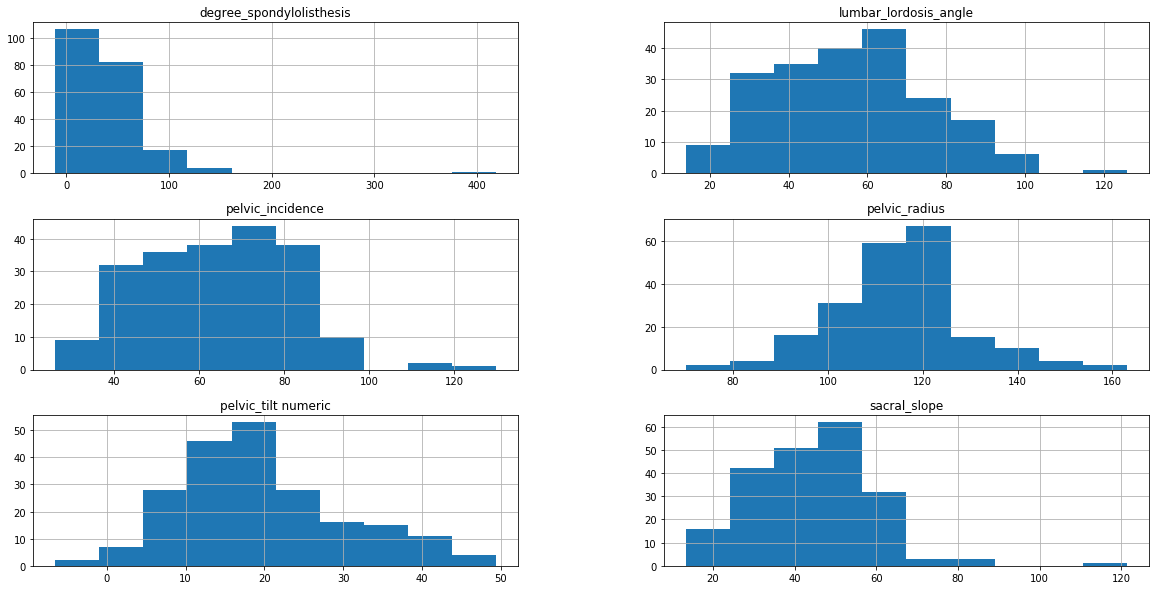

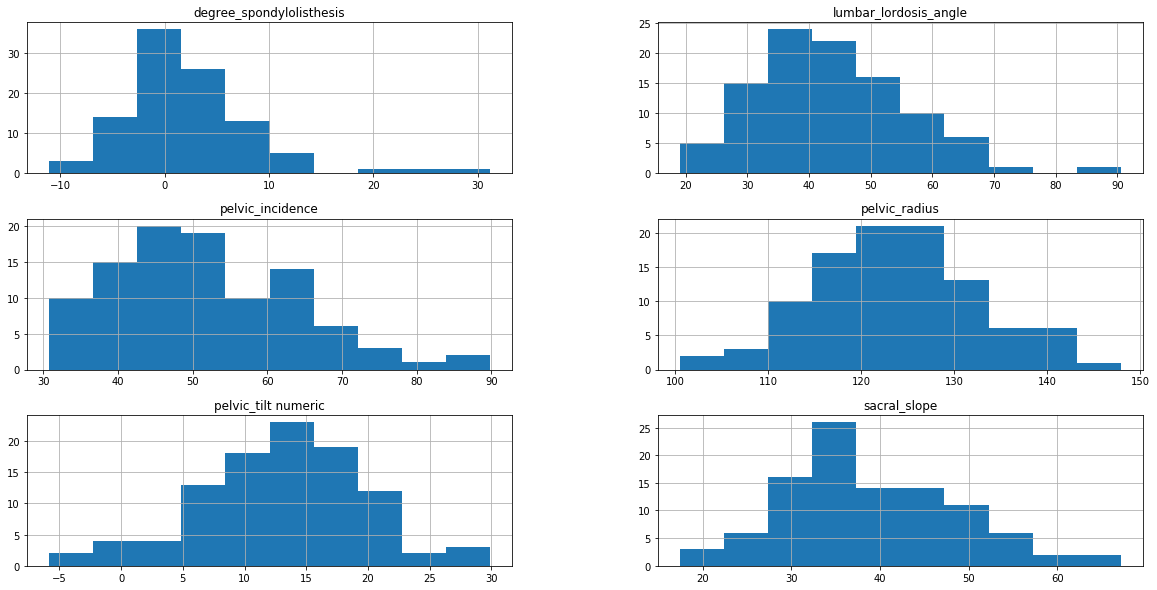

In [9]:
#distribution of class values and other attributes
Data.groupby('class').hist(figsize=(20, 10));

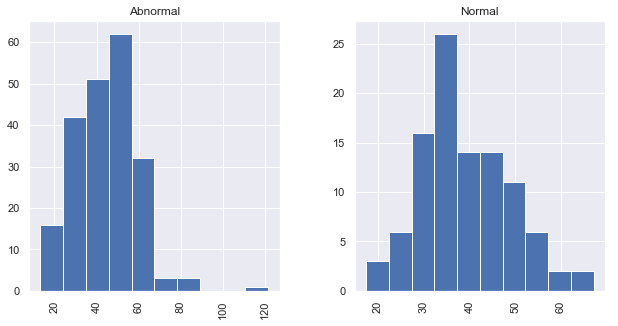

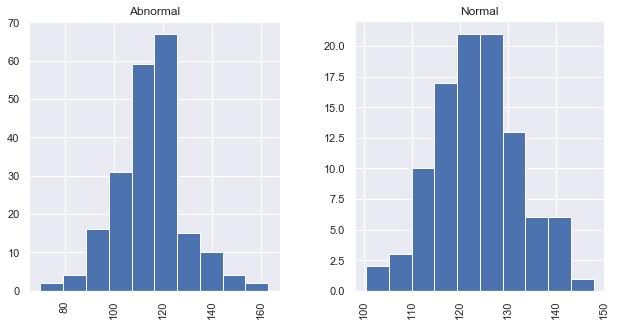

In [11]:
#Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization
sns.set()
Data.hist(by='class',column='sacral_slope',figsize=(10,5));
Data.hist(by='class',column='pelvic_radius',figsize=(10,5));

# Encode the Class variable to integer.

In [19]:
count=LabelEncoder()
Data["class"]=count.fit_transform(Data["class"])
Data.sample(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
149,79.249671,23.944825,40.796698,55.304846,98.622512,36.706395,0
144,60.044177,14.309656,58.038865,45.734521,105.131664,30.409133,0
255,67.538182,14.655042,58.001429,52.883139,123.632260,25.970206,1
24,36.125683,22.758753,29.000000,13.366931,115.577116,-3.237562,0
113,69.756665,19.279297,48.500000,50.477369,96.491370,51.169640,0
61,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,0
173,50.825029,9.064729,56.300000,41.760300,78.999454,23.041524,0
155,66.804796,14.551602,72.084912,52.253195,82.456038,41.685474,0
58,43.203185,19.663146,35.000000,23.540039,124.846109,-2.919076,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0


# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [20]:
# Feature set
X = Data.drop(columns= "class")
X.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


In [21]:
# Target setSplit the dat as train and test with a ratio of 70:30.
y = Data["class"]

# Split the dat as train and test with a ratio of 70:30.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 1)

# Normalize your Data (X) to get values between 0 to 1.

In [23]:
scaler =preprocessing.MinMaxScaler()
scaledX_train = scaler.fit_transform(X_train)
scaledX_test = scaler.transform(X_test)

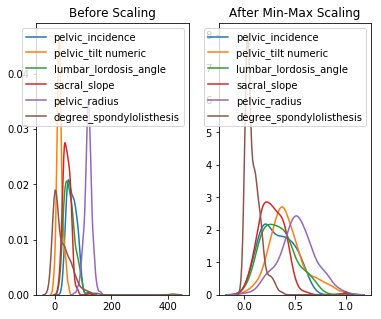

In [24]:
scaled_X = pd.DataFrame(scaledX_train, columns=['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis'])
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(Data['pelvic_incidence'], ax=ax1)
sns.kdeplot(Data['pelvic_tilt numeric'], ax=ax1)
sns.kdeplot(Data['lumbar_lordosis_angle'], ax=ax1)
sns.kdeplot(Data['sacral_slope'], ax=ax1)
sns.kdeplot(Data['pelvic_radius'], ax=ax1)
sns.kdeplot(Data['degree_spondylolisthesis'], ax=ax1)

ax2.set_title('After Min-Max Scaling')
sns.kdeplot(scaled_X['pelvic_incidence'], ax=ax2)
sns.kdeplot(scaled_X['pelvic_tilt numeric'], ax=ax2)
sns.kdeplot(scaled_X['lumbar_lordosis_angle'], ax=ax2)
sns.kdeplot(scaled_X['sacral_slope'], ax=ax2)
sns.kdeplot(scaled_X['pelvic_radius'], ax=ax2)
sns.kdeplot(scaled_X['degree_spondylolisthesis'], ax=ax2)
plt.show()

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [26]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(scaledX_train,y_train)
test_pred=knn.predict(X_test)
if test_pred.all()== 0:
    print("Predicted class on test dataset is Abnormal")
else:
        print("Predicted class on test dataset is normal")

Predicted class on test dataset is Abnormal


# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [33]:
from sklearn.metrics import accuracy_score
print("Performance Score of classification on test dataset is")
accuracy_score(test_pred,y_test)

Performance Score of classification on test dataset is


0.7096774193548387

# What is the best K value for your classifcation?
#Find at which k value you get the best score.

In [28]:
from sklearn.preprocessing import StandardScaler

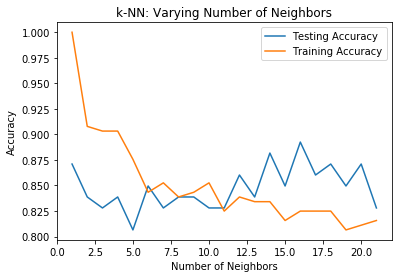

Best accuracy of testing is 0.8924731182795699 with K = 16


In [64]:
import numpy
neighbors =np.arange(1,22)
train_accuracy_plot = []
test_accuracy_plot = []

#loop for different values of K
for i, k in enumerate(neighbors):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=25)
    sc=StandardScaler()
    scaledX_train = sc.fit_transform(X_train)
    scaledX_test = sc.transform(X_test)
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaledX_train,y_train)
    train_accuracy_plot.append(knn.score(scaledX_train,y_train))
    test_accuracy_plot.append(knn.score(scaledX_test,y_test))
    
#Creating Plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

#value of k at max accuracy 
print("Best accuracy of testing is {} with K = {}".format(np.max(test_accuracy_plot),1+test_accuracy_plot.index(np.max(test_accuracy_plot))))

# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [12]:
# import data 3C_weka.csv
df=pd.read_csv("3Classdata.csv")

In [13]:
df.head(10)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Hernia
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Hernia
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,Hernia
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Hernia
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Hernia


In [14]:
df.tail(10)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
300,50.676677,6.461501,35.000000,44.215175,116.587970,-0.214711,Normal
301,89.014875,26.075981,69.021259,62.938894,111.481075,6.061508,Normal
302,54.600316,21.488974,29.360216,33.111342,118.343321,-1.471067,Normal
303,34.382299,2.062683,32.390820,32.319617,128.300199,-3.365516,Normal
304,45.075450,12.306951,44.583177,32.768499,147.894637,-8.941709,Normal
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [15]:
# missing values
df.isnull().any()

pelvic_incidence            False
pelvic_tilt                 False
lumbar_lordosis_angle       False
sacral_slope                False
pelvic_radius               False
degree_spondylolisthesis    False
class                       False
dtype: bool

In [16]:
# List unique values in the Data['class'] column
df['class'].unique()

array(['Hernia', 'Spondylolisthesis', 'Normal'], dtype=object)

In [18]:
# Datatype information about Dataset
df.dtypes

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

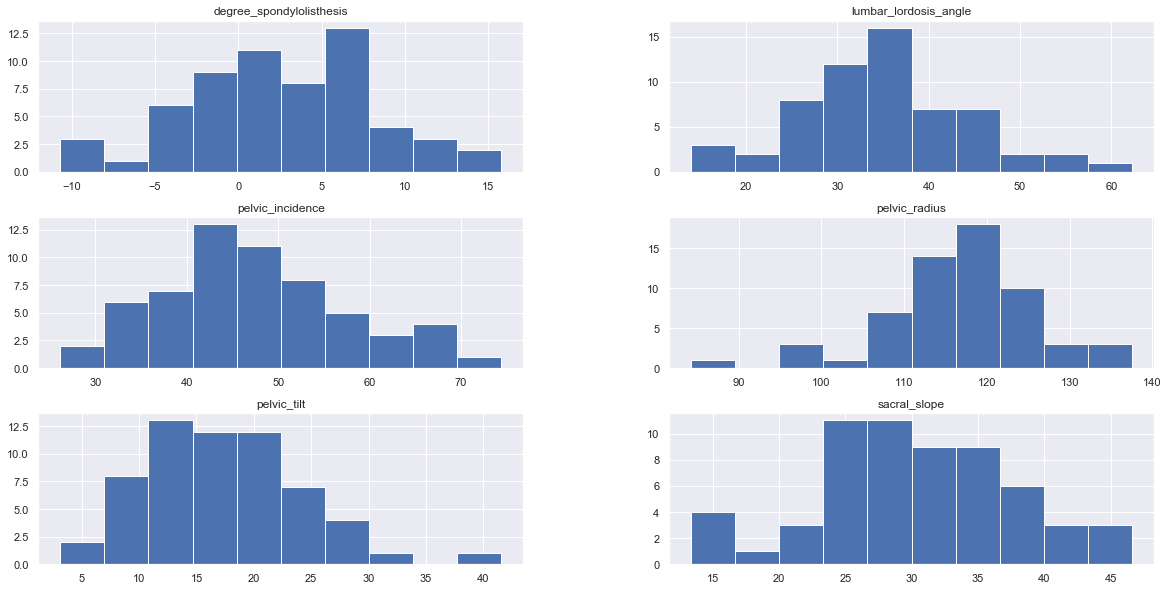

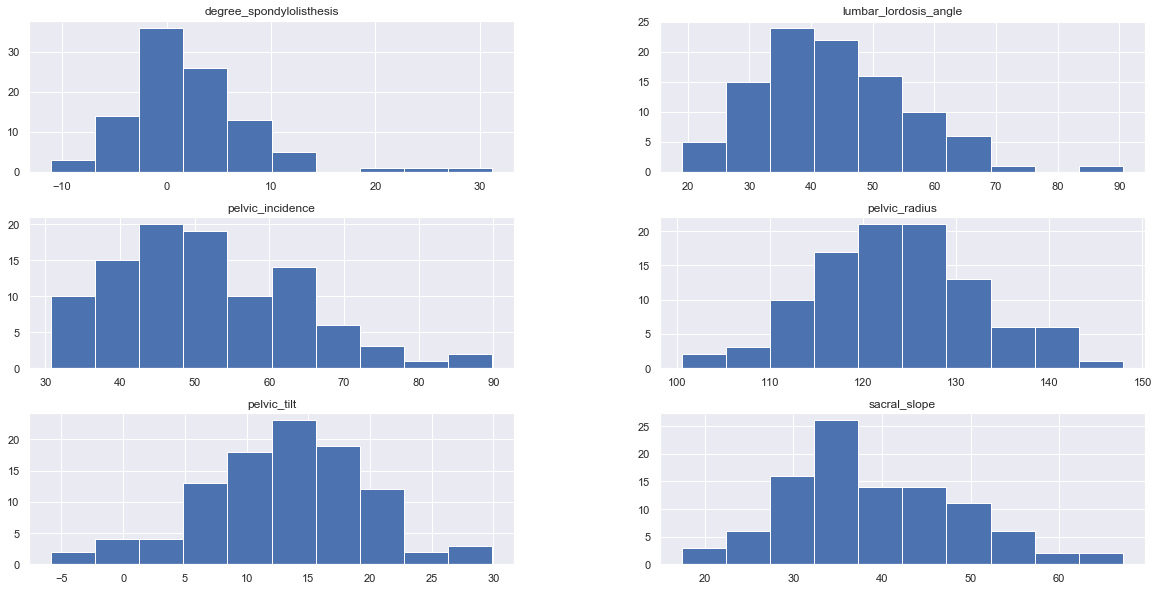

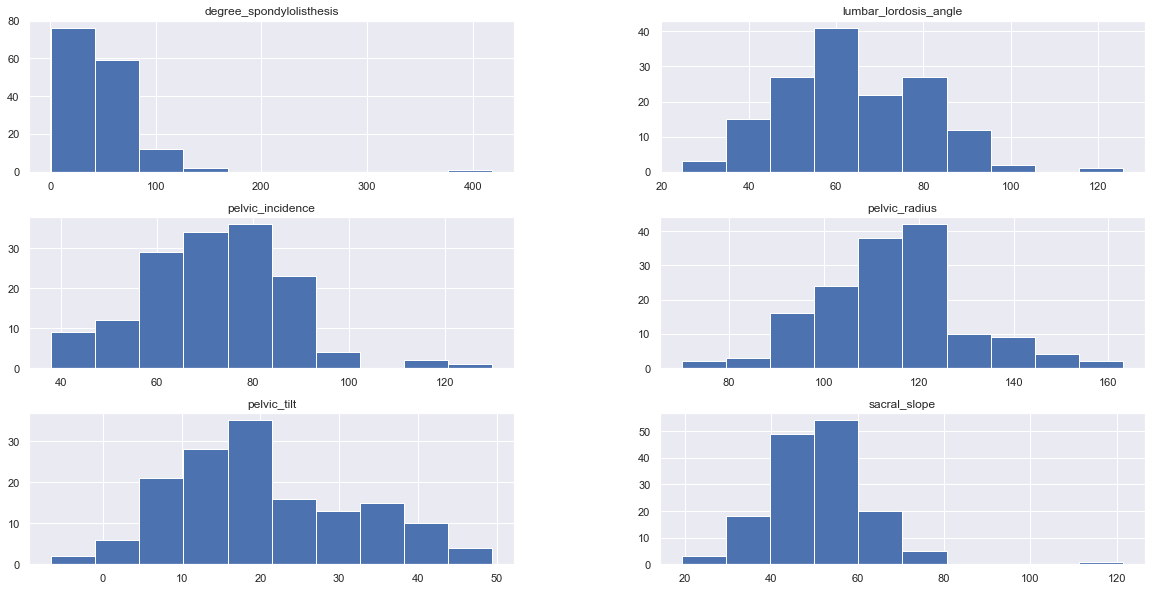

In [19]:
#distribution of class values and other attributes
df.groupby('class').hist(figsize=(20, 10));

# Encode the Class variable to integer

In [48]:
number=LabelEncoder()
df["class"]=number.fit_transform(df["class"])
df.sample(10)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
55,47.657730,13.277385,36.679985,34.380345,98.249781,6.273012,0
287,33.041688,-0.324678,19.071075,33.366366,120.388611,9.354365,1
97,74.720746,19.756942,82.735360,54.963804,109.356594,33.306067,2
112,42.021386,-6.554948,67.900000,48.576334,111.585782,27.338671,2
35,31.484218,7.826221,24.284818,23.657997,113.833145,4.393080,0
195,71.241764,5.268270,85.999584,65.973493,110.703107,38.259864,2
174,61.411737,25.384364,39.096869,36.027373,103.404597,21.843407,2
285,67.804694,16.550662,43.256802,51.254033,119.685645,4.867540,1
46,48.332638,22.227784,36.181993,26.104854,117.384625,6.481709,0
107,78.425951,33.425951,76.277439,45.000000,138.554111,77.155172,2


# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [49]:
# Feature set
df_X = df.drop(columns= "class")
df_X.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


In [50]:
# Target set
df_y = df["class"]


# Split the dat as train and test with a ratio of 70:30

In [51]:
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df_X,df_y,test_size=0.3,random_state = 5)

# Normalize your Data (X) to get values between 0 to 1.

In [52]:
Minmax =preprocessing.MinMaxScaler()
df_X = Minmax.fit_transform(df_X)


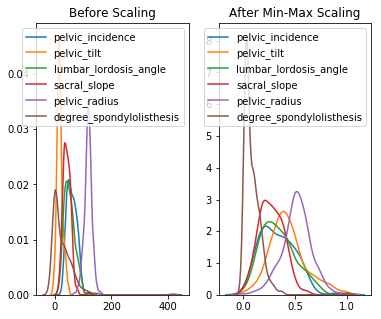

In [53]:
scaled_X = pd.DataFrame(df_X, columns=['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis'])
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(df['pelvic_incidence'], ax=ax1)
sns.kdeplot(df['pelvic_tilt'], ax=ax1)
sns.kdeplot(df['lumbar_lordosis_angle'], ax=ax1)
sns.kdeplot(df['sacral_slope'], ax=ax1)
sns.kdeplot(df['pelvic_radius'], ax=ax1)
sns.kdeplot(df['degree_spondylolisthesis'], ax=ax1)

ax2.set_title('After Min-Max Scaling')
sns.kdeplot(scaled_X['pelvic_incidence'], ax=ax2)
sns.kdeplot(scaled_X['pelvic_tilt'], ax=ax2)
sns.kdeplot(scaled_X['lumbar_lordosis_angle'], ax=ax2)
sns.kdeplot(scaled_X['sacral_slope'], ax=ax2)
sns.kdeplot(scaled_X['pelvic_radius'], ax=ax2)
sns.kdeplot(scaled_X['degree_spondylolisthesis'], ax=ax2)
plt.show()

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [54]:
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(df_X_train,df_y_train)
test_pred1=knn1.predict(df_X_test)
print("predicted class on test data \n",test_pred1)

predicted class on test data 
 [1 1 1 0 1 0 1 2 1 0 1 1 0 2 1 0 1 0 2 2 1 2 2 2 2 2 2 1 2 2 0 1 1 1 2 2 2
 2 2 1 1 2 0 0 1 0 1 1 1 1 2 2 1 2 0 2 2 1 2 2 2 1 1 1 1 2 1 0 1 0 0 2 0 2
 2 2 0 1 2 1 2 2 0 2 2 2 2 1 2 1 1 1 2]


# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [56]:
from sklearn.metrics import accuracy_score
print("Performance Score of classification on test dataset is")
accuracy_score(test_pred1,df_y_test)

Performance Score of classification on test dataset is


0.8279569892473119

# What is the best K value for your classifcation?
#Find at which k value you get the best score.

In [57]:
from sklearn.preprocessing import StandardScaler

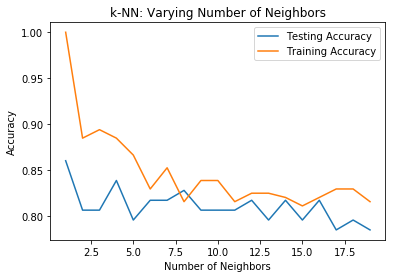

Best accuracy of testing is 0.8602150537634409 with K = 1


In [58]:
import numpy
neighbors =np.arange(1,20)
train_accuracy_plot1 = []
test_accuracy_plot1 = []

#loop for different values of K
for i, k in enumerate(neighbors):
    df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df_X,df_y,test_size=0.3,random_state =25)
    sc=StandardScaler()
    scaled_df_X_train = sc.fit_transform(df_X_train)
    scaled_df_X_test = sc.transform(df_X_test)
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaled_df_X_train,df_y_train)
    train_accuracy_plot1.append(knn.score(scaled_df_X_train,df_y_train))
    test_accuracy_plot1.append(knn.score(scaled_df_X_test,df_y_test))
    
#Creating Plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot1, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot1, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

#value of k at max accuracy 
print("Best accuracy of testing is {} with K = {}".format(np.max(test_accuracy_plot1),1+test_accuracy_plot1.index(np.max(test_accuracy_plot1))))